In [1]:
import os
os.chdir('../')

import DeepPurpose.CompoundPred as models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *

from sklearn.metrics import mean_squared_error, roc_auc_score, average_precision_score, f1_score

In [64]:
def run_Morgan(fold_n, balanced):
    
    train = pd.read_csv('./aicures_data/train_cv/fold_'+str(fold_n)+'/train.csv')
    dev = pd.read_csv('./aicures_data/train_cv/fold_'+str(fold_n)+'/dev.csv')
    test = pd.read_csv('./aicures_data/train_cv/fold_'+str(fold_n)+'/test.csv')
    
    if balanced:
        # oversample balanced training
        train = pd.concat([train[train.activity == 1].sample(n = len(train[train.activity == 0]), replace=True), train[train.activity == 0]]).sample(frac = 1).reset_index(drop = True)
    
    X_train = train.smiles.values
    y_train = train.activity.values
    X_dev = dev.smiles.values
    y_dev = dev.activity.values
    X_test = test.smiles.values
    y_test = test.activity.values
    
    drug_encoding = 'Morgan'
    train = data_process(X_drug = X_train, y = y_train, 
                                    drug_encoding = drug_encoding,
                                    split_method='no_split', 
                                    random_seed = 1)

    val = data_process(X_drug = X_dev, y = y_dev, 
                                    drug_encoding = drug_encoding,
                                    split_method='no_split', 
                                    random_seed = 1)

    test = data_process(X_drug = X_test, y = y_test, 
                                    drug_encoding = drug_encoding,
                                    split_method='no_split', 
                                    random_seed = 1)
    
    config = generate_config(drug_encoding = drug_encoding, 
                         cls_hidden_dims = [512], 
                         train_epoch = 10, 
                         LR = 0.0001, 
                         batch_size = 256
                        )
    
    model = models.model_initialize(**config)
    model.train(train, val, test)
    
    scores = model.predict(test)
    
    return roc_auc_score(test.Label.values, scores), average_precision_score(test.Label.values, scores), scores, test.Label.values

Drug Property Prediction Mode...
in total: 3330 drugs
encoding drug...
unique drugs: 1694
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 202 drugs
encoding drug...
unique drugs: 202
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 201 drugs
encoding drug...
unique drugs: 201
drug encoding finished...
do not do train/test split on the data for already splitted data
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69260. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.89627 , AUPRC: 0.70668 , F1: 0.66666
Training at Epoch 2 iteration 0 with loss 0.67887. Total time 0.00027 hours
Validation at Epoch 2 , AUROC: 0.87272 , AUPRC: 0.63954 , F1: 0.60869
Training at Epoch 3 iteration 0 with loss 0.62554. Total time 0.00055 hours
Validation at Epoch 3 , AUROC: 

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 2 , AUROC: 0.72474 , AUPRC: 0.07426 , F1: 0.0
Training at Epoch 3 iteration 0 with loss 0.63924. Total time 0.00055 hours
Validation at Epoch 3 , AUROC: 0.69191 , AUPRC: 0.05357 , F1: 0.0
Training at Epoch 4 iteration 0 with loss 0.50505. Total time 0.00083 hours
Validation at Epoch 4 , AUROC: 0.65530 , AUPRC: 0.04334 , F1: 0.0
Training at Epoch 5 iteration 0 with loss 0.25314. Total time 0.00111 hours
Validation at Epoch 5 , AUROC: 0.60353 , AUPRC: 0.03475 , F1: 0.0
Training at Epoch 6 iteration 0 with loss 0.06097. Total time 0.00138 hours
Validation at Epoch 6 , AUROC: 0.55555 , AUPRC: 0.03306 , F1: 0.0
Training at Epoch 7 iteration 0 with loss 0.01442. Total time 0.00166 hours
Validation at Epoch 7 , AUROC: 0.52651 , AUPRC: 0.03763 , F1: 0.0
Training at Epoch 8 iteration 0 with loss 0.00662. Total time 0.00194 hours
Validation at Epoch 8 , AUROC: 0.52904 , AUPRC: 0.03632 , F1: 0.0
Training at Epoch 9 iteration 0 with loss 0.00250. Total time 0.00222 hours
Valida

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Testing AUROC: 0.5984848484848485 , AUPRC: 0.05483324043106652 , F1: 0.0
--- Training Finished ---
predicting...
Drug Property Prediction Mode...
in total: 3312 drugs
encoding drug...
unique drugs: 1695
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 201 drugs
encoding drug...
unique drugs: 201
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 201 drugs
encoding drug...
unique drugs: 201
drug encoding finished...
do not do train/test split on the data for already splitted data
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69745. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.89562 , AUPRC: 0.44523 , F1: 0.03314
Training at Epoch 2 iteration 0 with loss 0.68396. Total time 0.00027 hours
Validation at Epoch 2 , AUROC: 0.85690 , AUPRC: 0.38425 , F1: 0.

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 1 , AUROC: 0.21989 , AUPRC: 0.01099 , F1: 0.0
Training at Epoch 2 iteration 0 with loss 0.67935. Total time 0.00027 hours
Validation at Epoch 2 , AUROC: 0.28102 , AUPRC: 0.01187 , F1: 0.0
Training at Epoch 3 iteration 0 with loss 0.63832. Total time 0.00055 hours
Validation at Epoch 3 , AUROC: 0.31751 , AUPRC: 0.01252 , F1: 0.0
Training at Epoch 4 iteration 0 with loss 0.51902. Total time 0.00083 hours
Validation at Epoch 4 , AUROC: 0.35218 , AUPRC: 0.01326 , F1: 0.0
Training at Epoch 5 iteration 0 with loss 0.24404. Total time 0.00111 hours
Validation at Epoch 5 , AUROC: 0.39233 , AUPRC: 0.01437 , F1: 0.0
Training at Epoch 6 iteration 0 with loss 0.04885. Total time 0.00138 hours
Validation at Epoch 6 , AUROC: 0.43156 , AUPRC: 0.01566 , F1: 0.0
Training at Epoch 7 iteration 0 with loss 0.00890. Total time 0.00138 hours
Validation at Epoch 7 , AUROC: 0.44343 , AUPRC: 0.01604 , F1: 0.0
Training at Epoch 8 iteration 0 with loss 0.01218. Total time 0.00166 hours
Valida

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 1 , AUROC: 0.37681 , AUPRC: 0.00769 , F1: 0.0
Training at Epoch 2 iteration 0 with loss 0.68122. Total time 0.00027 hours
Validation at Epoch 2 , AUROC: 0.42028 , AUPRC: 0.00826 , F1: 0.0
Training at Epoch 3 iteration 0 with loss 0.64051. Total time 0.00027 hours
Validation at Epoch 3 , AUROC: 0.44927 , AUPRC: 0.00869 , F1: 0.0
Training at Epoch 4 iteration 0 with loss 0.50562. Total time 0.00055 hours
Validation at Epoch 4 , AUROC: 0.41545 , AUPRC: 0.00819 , F1: 0.0
Training at Epoch 5 iteration 0 with loss 0.23183. Total time 0.00083 hours
Validation at Epoch 5 , AUROC: 0.41062 , AUPRC: 0.00813 , F1: 0.0
Training at Epoch 6 iteration 0 with loss 0.03374. Total time 0.00111 hours
Validation at Epoch 6 , AUROC: 0.44927 , AUPRC: 0.00869 , F1: 0.0
Training at Epoch 7 iteration 0 with loss 0.02935. Total time 0.00138 hours
Validation at Epoch 7 , AUROC: 0.45893 , AUPRC: 0.00884 , F1: 0.0
Training at Epoch 8 iteration 0 with loss 0.00489. Total time 0.00166 hours
Valida

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Testing AUROC: 0.4014598540145985 , AUPRC: 0.01436329226242399 , F1: 0.0
--- Training Finished ---
predicting...
Drug Property Prediction Mode...
in total: 3290 drugs
encoding drug...
unique drugs: 1688
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 201 drugs
encoding drug...
unique drugs: 201
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 208 drugs
encoding drug...
unique drugs: 208
drug encoding finished...
do not do train/test split on the data for already splitted data
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69326. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 1.0 , AUPRC: 1.0 , F1: 0.61538
Training at Epoch 2 iteration 0 with loss 0.68281. Total time 0.00027 hours
Validation at Epoch 2 , AUROC: 1.0 , AUPRC: 1.0 , F1: 0.88888
Training a

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Testing AUROC: 0.5314009661835748 , AUPRC: 0.01020408163265306 , F1: 0.0
--- Training Finished ---
predicting...
Drug Property Prediction Mode...
in total: 3306 drugs
encoding drug...
unique drugs: 1694
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 202 drugs
encoding drug...
unique drugs: 202
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 201 drugs
encoding drug...
unique drugs: 201
drug encoding finished...
do not do train/test split on the data for already splitted data
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69290. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.93132 , AUPRC: 0.16458 , F1: 0.0
Training at Epoch 2 iteration 0 with loss 0.68537. Total time 0.00027 hours
Validation at Epoch 2 , AUROC: 0.90619 , AUPRC: 0.12702 , F1: 0.2222

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 6 , AUROC: 0.66499 , AUPRC: 0.18299 , F1: 0.0
Training at Epoch 7 iteration 0 with loss 0.01413. Total time 0.00166 hours
Validation at Epoch 7 , AUROC: 0.65661 , AUPRC: 0.18260 , F1: 0.0
Training at Epoch 8 iteration 0 with loss 0.00739. Total time 0.00194 hours
Validation at Epoch 8 , AUROC: 0.66834 , AUPRC: 0.18307 , F1: 0.0
Training at Epoch 9 iteration 0 with loss 0.00403. Total time 0.00222 hours
Validation at Epoch 9 , AUROC: 0.63149 , AUPRC: 0.08176 , F1: 0.0
Training at Epoch 10 iteration 0 with loss 0.00315. Total time 0.0025 hours
Validation at Epoch 10 , AUROC: 0.65159 , AUPRC: 0.18235 , F1: 0.0
--- Go for Testing ---
Testing AUROC: 1.0 , AUPRC: 1.0 , F1: 0.8571428571428571
--- Training Finished ---
predicting...
Drug Property Prediction Mode...
in total: 3308 drugs
encoding drug...
unique drugs: 1694
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 201 drugs
encoding dr

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Testing AUROC: 0.7219430485762144 , AUPRC: 0.3526698350573106 , F1: 0.0
--- Training Finished ---
predicting...
ROC-Mean 0.6795
ROC-STD 0.2009
PRC-Mean 0.3927
PRC-STD 0.3323


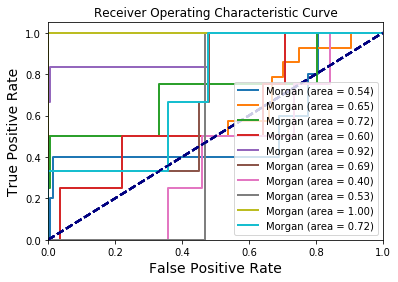

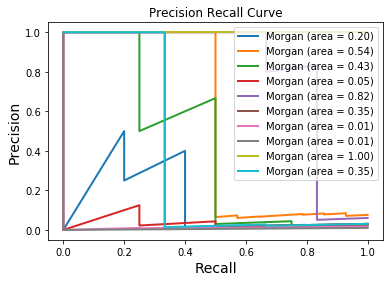

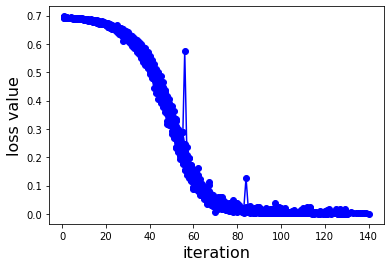

In [85]:
roc_ = []
prc_ = []
scores_ = []
labels_ = []
for i in range(10):
    roc, prc, scores, labels = run_Morgan(i, True)
    roc_.append(roc)
    prc_.append(prc)
    scores_.append(scores)
    labels_.append(labels)
    
print('ROC-Mean {:.4f}'.format(np.mean(np.array(roc_))))
print('ROC-STD {:.4f}'.format(np.std(np.array(roc_))))
print('PRC-Mean {:.4f}'.format(np.mean(np.array(prc_))))
print('PRC-STD {:.4f}'.format(np.std(np.array(prc_))))

with open('./scores_aicures/morgan_score.pkl', 'wb') as f:
    pickle.dump(scores_, f, pickle.HIGHEST_PROTOCOL)


In [87]:
def run_Daylight(fold_n, balanced):
    
    train = pd.read_csv('./aicures_data/train_cv/fold_'+str(fold_n)+'/train.csv')
    dev = pd.read_csv('./aicures_data/train_cv/fold_'+str(fold_n)+'/dev.csv')
    test = pd.read_csv('./aicures_data/train_cv/fold_'+str(fold_n)+'/test.csv')
    
    if balanced:
        # oversample balanced training
        train = pd.concat([train[train.activity == 1].sample(n = len(train[train.activity == 0]), replace=True), train[train.activity == 0]]).sample(frac = 1).reset_index(drop = True)
    
    X_train = train.smiles.values
    y_train = train.activity.values
    X_dev = dev.smiles.values
    y_dev = dev.activity.values
    X_test = test.smiles.values
    y_test = test.activity.values
    
    drug_encoding = 'Daylight'
    train = data_process(X_drug = X_train, y = y_train, 
                                    drug_encoding = drug_encoding,
                                    split_method='no_split', 
                                    random_seed = 1)

    val = data_process(X_drug = X_dev, y = y_dev, 
                                    drug_encoding = drug_encoding,
                                    split_method='no_split', 
                                    random_seed = 1)

    test = data_process(X_drug = X_test, y = y_test, 
                                    drug_encoding = drug_encoding,
                                    split_method='no_split', 
                                    random_seed = 1)
    
    config = generate_config(drug_encoding = drug_encoding, 
                         cls_hidden_dims = [512], 
                         train_epoch = 10, 
                         LR = 0.0001, 
                         batch_size = 256
                        )
    
    model = models.model_initialize(**config)
    model.train(train, val, test)
    
    scores = model.predict(test)
    
    return roc_auc_score(test.Label.values, scores), average_precision_score(test.Label.values, scores), scores, test.Label.values

Drug Property Prediction Mode...
in total: 3330 drugs
encoding drug...
unique drugs: 1694
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 202 drugs
encoding drug...
unique drugs: 202
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 201 drugs
encoding drug...
unique drugs: 201
drug encoding finished...
do not do train/test split on the data for already splitted data
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69381. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.91983 , AUPRC: 0.77238 , F1: 0.13145
Training at Epoch 2 iteration 0 with loss 0.62907. Total time 0.00027 hours
Validation at Epoch 2 , AUROC: 0.92667 , AUPRC: 0.76797 , F1: 0.25742
Training at Epoch 3 iteration 0 with loss 0.53983. Total time 0.00055 hours
Validation at Epoch 3 , AUROC: 

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 4 , AUROC: 0.49242 , AUPRC: 0.02380 , F1: 0.0
Training at Epoch 5 iteration 0 with loss 0.15461. Total time 0.00138 hours
Validation at Epoch 5 , AUROC: 0.57575 , AUPRC: 0.03256 , F1: 0.0
Training at Epoch 6 iteration 0 with loss 0.04909. Total time 0.00166 hours
Validation at Epoch 6 , AUROC: 0.33712 , AUPRC: 0.01852 , F1: 0.0
Training at Epoch 7 iteration 0 with loss 0.01886. Total time 0.00222 hours
Validation at Epoch 7 , AUROC: 0.35858 , AUPRC: 0.01904 , F1: 0.0
Training at Epoch 8 iteration 0 with loss 0.01198. Total time 0.0025 hours
Validation at Epoch 8 , AUROC: 0.38383 , AUPRC: 0.02014 , F1: 0.0
Training at Epoch 9 iteration 0 with loss 0.01182. Total time 0.00277 hours
Validation at Epoch 9 , AUROC: 0.41540 , AUPRC: 0.02163 , F1: 0.0
Training at Epoch 10 iteration 0 with loss 0.00688. Total time 0.00305 hours
Validation at Epoch 10 , AUROC: 0.34848 , AUPRC: 0.01846 , F1: 0.0
--- Go for Testing ---
Testing AUROC: 0.7868020304568528 , AUPRC: 0.3706447963800

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


--- Training Finished ---
predicting...
Drug Property Prediction Mode...
in total: 3312 drugs
encoding drug...
unique drugs: 1695
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 201 drugs
encoding drug...
unique drugs: 201
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 201 drugs
encoding drug...
unique drugs: 201
drug encoding finished...
do not do train/test split on the data for already splitted data
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69304. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.75589 , AUPRC: 0.45138 , F1: 0.03007
Training at Epoch 2 iteration 0 with loss 0.62729. Total time 0.00027 hours
Validation at Epoch 2 , AUROC: 0.69191 , AUPRC: 0.41299 , F1: 0.05970
Training at Epoch 3 iteration 0 with loss 0.50961. Total time 0.000

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 3 , AUROC: 0.50912 , AUPRC: 0.03072 , F1: 0.0
Training at Epoch 4 iteration 0 with loss 0.27916. Total time 0.00083 hours
Validation at Epoch 4 , AUROC: 0.53056 , AUPRC: 0.03031 , F1: 0.0
Training at Epoch 5 iteration 0 with loss 0.10095. Total time 0.00111 hours
Validation at Epoch 5 , AUROC: 0.55611 , AUPRC: 0.03274 , F1: 0.0
Training at Epoch 6 iteration 0 with loss 0.04745. Total time 0.00138 hours
Validation at Epoch 6 , AUROC: 0.55520 , AUPRC: 0.03252 , F1: 0.0
Training at Epoch 7 iteration 0 with loss 0.01283. Total time 0.00194 hours
Validation at Epoch 7 , AUROC: 0.52965 , AUPRC: 0.03138 , F1: 0.0
Training at Epoch 8 iteration 0 with loss 0.00468. Total time 0.00222 hours
Validation at Epoch 8 , AUROC: 0.52417 , AUPRC: 0.03166 , F1: 0.0
Training at Epoch 9 iteration 0 with loss 0.00505. Total time 0.0025 hours
Validation at Epoch 9 , AUROC: 0.51505 , AUPRC: 0.03195 , F1: 0.0
Training at Epoch 10 iteration 0 with loss 0.00263. Total time 0.00277 hours
Valida

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 3 , AUROC: 0.55555 , AUPRC: 0.01075 , F1: 0.0
Training at Epoch 4 iteration 0 with loss 0.26518. Total time 0.00083 hours
Validation at Epoch 4 , AUROC: 0.58454 , AUPRC: 0.01149 , F1: 0.0
Training at Epoch 5 iteration 0 with loss 0.08297. Total time 0.00111 hours
Validation at Epoch 5 , AUROC: 0.46376 , AUPRC: 0.00892 , F1: 0.0
Training at Epoch 6 iteration 0 with loss 0.03748. Total time 0.00138 hours
Validation at Epoch 6 , AUROC: 0.42995 , AUPRC: 0.00840 , F1: 0.0
Training at Epoch 7 iteration 0 with loss 0.00888. Total time 0.00166 hours
Validation at Epoch 7 , AUROC: 0.42995 , AUPRC: 0.00840 , F1: 0.0
Training at Epoch 8 iteration 0 with loss 0.03798. Total time 0.00194 hours
Validation at Epoch 8 , AUROC: 0.42512 , AUPRC: 0.00833 , F1: 0.0
Training at Epoch 9 iteration 0 with loss 0.03120. Total time 0.0025 hours
Validation at Epoch 9 , AUROC: 0.39613 , AUPRC: 0.00793 , F1: 0.0
Training at Epoch 10 iteration 0 with loss 0.00565. Total time 0.00277 hours
Valida

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Testing AUROC: 0.35748792270531404 , AUPRC: 0.007462686567164179 , F1: 0.0
--- Training Finished ---
predicting...
Drug Property Prediction Mode...
in total: 3306 drugs
encoding drug...
unique drugs: 1694
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 202 drugs
encoding drug...
unique drugs: 202
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 201 drugs
encoding drug...
unique drugs: 201
drug encoding finished...
do not do train/test split on the data for already splitted data
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69362. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.91289 , AUPRC: 0.10004 , F1: 0.03726
Training at Epoch 2 iteration 0 with loss 0.65202. Total time 0.00027 hours
Validation at Epoch 2 , AUROC: 0.94472 , AUPRC: 0.44189 , F1: 

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 9 , AUROC: 0.53768 , AUPRC: 0.12375 , F1: 0.0
Training at Epoch 10 iteration 0 with loss 0.00907. Total time 0.00277 hours
Validation at Epoch 10 , AUROC: 0.54271 , AUPRC: 0.17947 , F1: 0.0
--- Go for Testing ---
Testing AUROC: 0.8730964467005076 , AUPRC: 0.7596153846153846 , F1: 0.8571428571428571
--- Training Finished ---
predicting...
Drug Property Prediction Mode...
in total: 3308 drugs
encoding drug...
unique drugs: 1694
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 201 drugs
encoding drug...
unique drugs: 201
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 202 drugs
encoding drug...
unique drugs: 202
drug encoding finished...
do not do train/test split on the data for already splitted data
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 wit

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Testing AUROC: 0.6566164154103852 , AUPRC: 0.3634891722323416 , F1: 0.0
--- Training Finished ---
predicting...
ROC-Mean 0.6686
ROC-STD 0.1728
PRC-Mean 0.3845
PRC-STD 0.2901


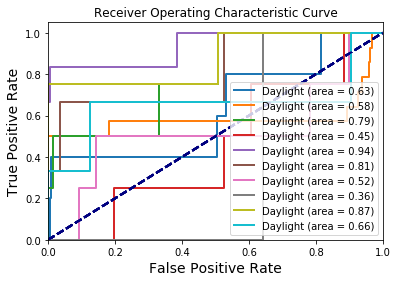

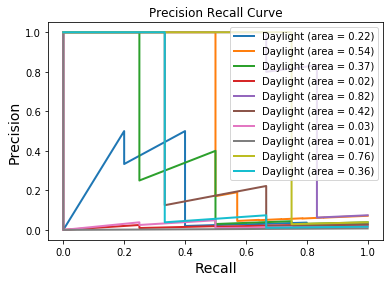

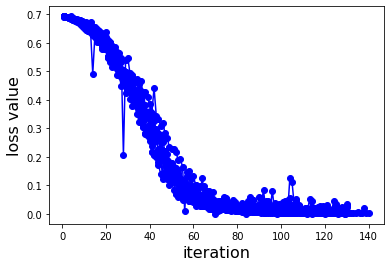

In [88]:
roc_ = []
prc_ = []
scores_ = []
labels_ = []

drug_encoding = 'Daylight'

for i in range(10):
    roc, prc, scores, labels = eval('run_' + drug_encoding + '(i, True)')
    roc_.append(roc)
    prc_.append(prc)
    scores_.append(scores)
    labels_.append(labels)
    
print('ROC-Mean {:.4f}'.format(np.mean(np.array(roc_))))
print('ROC-STD {:.4f}'.format(np.std(np.array(roc_))))
print('PRC-Mean {:.4f}'.format(np.mean(np.array(prc_))))
print('PRC-STD {:.4f}'.format(np.std(np.array(prc_))))

with open('./scores_aicures/' + drug_encoding + '_score.pkl', 'wb') as f:
    pickle.dump(scores_, f, pickle.HIGHEST_PROTOCOL)


In [23]:
def run_MPNN(fold_n, balanced):
    
    train = pd.read_csv('./aicures_data/train_cv/fold_'+str(fold_n)+'/train.csv')
    dev = pd.read_csv('./aicures_data/train_cv/fold_'+str(fold_n)+'/dev.csv')
    test = pd.read_csv('./aicures_data/train_cv/fold_'+str(fold_n)+'/test.csv')
    
    if balanced:
        # oversample balanced training
        train = pd.concat([train[train.activity == 1].sample(n = len(train[train.activity == 0]), replace=True), train[train.activity == 0]]).sample(frac = 1).reset_index(drop = True)
    
    X_train = train.smiles.values
    y_train = train.activity.values
    X_dev = dev.smiles.values
    y_dev = dev.activity.values
    X_test = test.smiles.values
    y_test = test.activity.values
    
    drug_encoding = 'MPNN'
    train = data_process(X_drug = X_train, y = y_train, 
                                    drug_encoding = drug_encoding,
                                    split_method='no_split', 
                                    random_seed = 1)

    val = data_process(X_drug = X_dev, y = y_dev, 
                                    drug_encoding = drug_encoding,
                                    split_method='no_split', 
                                    random_seed = 1)

    test = data_process(X_drug = X_test, y = y_test, 
                                    drug_encoding = drug_encoding,
                                    split_method='no_split', 
                                    random_seed = 1)
    
    config = generate_config(drug_encoding = drug_encoding, 
                         cls_hidden_dims = [512], 
                         train_epoch = 10, 
                         LR = 0.001, 
                         batch_size = 128,
                         hidden_dim_drug = 128,
                         mpnn_hidden_size = 128,
                         mpnn_depth = 3 
                        )
    
    model = models.model_initialize(**config)
    model.train(train, val, test)
    
    scores = model.predict(test)
    
    return roc_auc_score(test.Label.values, scores), average_precision_score(test.Label.values, scores), scores, test.Label.values

Drug Property Prediction Mode...
in total: 3330 drugs
encoding drug...
unique drugs: 1694
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 202 drugs
encoding drug...
unique drugs: 202
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 201 drugs
encoding drug...
unique drugs: 201
drug encoding finished...
do not do train/test split on the data for already splitted data
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69434. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.91945 , AUPRC: 0.61072 , F1: 0.32911
Training at Epoch 2 iteration 0 with loss 0.54761. Total time 0.00111 hours
Validation at Epoch 2 , AUROC: 0.91223 , AUPRC: 0.59061 , F1: 0.37142
Training at Epoch 3 iteration 0 with loss 0.51494. Total time 0.0025 hours
Validation at Epoch 3 , AUROC: 0

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 6 , AUROC: 0.56818 , AUPRC: 0.14531 , F1: 0.0
Training at Epoch 7 iteration 0 with loss 0.37440. Total time 0.00861 hours
Validation at Epoch 7 , AUROC: 0.55681 , AUPRC: 0.14608 , F1: 0.22222
Training at Epoch 8 iteration 0 with loss 0.22712. Total time 0.01 hours
Validation at Epoch 8 , AUROC: 0.57449 , AUPRC: 0.10264 , F1: 0.13333
Training at Epoch 9 iteration 0 with loss 0.16511. Total time 0.01138 hours
Validation at Epoch 9 , AUROC: 0.56565 , AUPRC: 0.03867 , F1: 0.1
Training at Epoch 10 iteration 0 with loss 0.07268. Total time 0.01277 hours
Validation at Epoch 10 , AUROC: 0.58333 , AUPRC: 0.04784 , F1: 0.0
--- Go for Testing ---
Testing AUROC: 0.75 , AUPRC: 0.11914991942364205 , F1: 0.15384615384615385
--- Training Finished ---
predicting...
Drug Property Prediction Mode...
in total: 3312 drugs
encoding drug...
unique drugs: 1694
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in tota

Validation at Epoch 3 , AUROC: 0.22222 , AUPRC: 0.00617 , F1: 0.0
Training at Epoch 4 iteration 0 with loss 0.54161. Total time 0.00388 hours
Validation at Epoch 4 , AUROC: 0.06280 , AUPRC: 0.00512 , F1: 0.0
Training at Epoch 5 iteration 0 with loss 0.38637. Total time 0.00527 hours
Validation at Epoch 5 , AUROC: 0.07729 , AUPRC: 0.00520 , F1: 0.0
Training at Epoch 6 iteration 0 with loss 0.34252. Total time 0.00694 hours
Validation at Epoch 6 , AUROC: 0.04347 , AUPRC: 0.00502 , F1: 0.0
Training at Epoch 7 iteration 0 with loss 0.22412. Total time 0.00833 hours
Validation at Epoch 7 , AUROC: 0.04347 , AUPRC: 0.00502 , F1: 0.0
Training at Epoch 8 iteration 0 with loss 0.32370. Total time 0.00972 hours
Validation at Epoch 8 , AUROC: 0.04347 , AUPRC: 0.00502 , F1: 0.0
Training at Epoch 9 iteration 0 with loss 0.19907. Total time 0.01111 hours
Validation at Epoch 9 , AUROC: 0.03381 , AUPRC: 0.00497 , F1: 0.0
Training at Epoch 10 iteration 0 with loss 0.18580. Total time 0.0125 hours
Valida

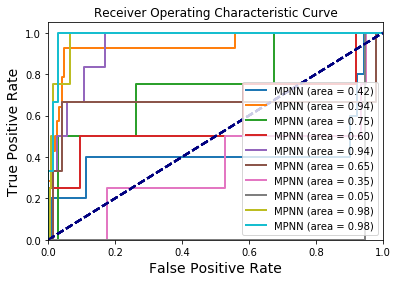

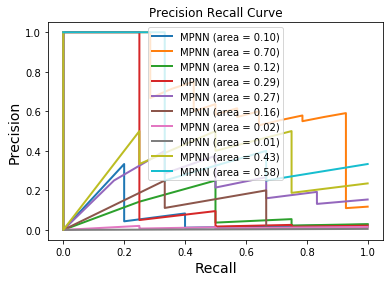

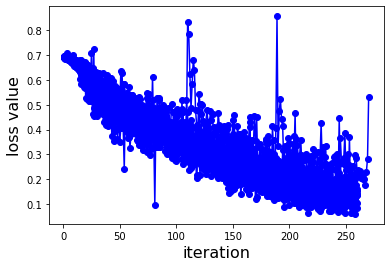

In [24]:
roc_ = []
prc_ = []
scores_ = []
labels_ = []

drug_encoding = 'MPNN'

for i in range(10):
    roc, prc, scores, labels = eval('run_' + drug_encoding + '(i, True)')
    roc_.append(roc)
    prc_.append(prc)
    scores_.append(scores)
    labels_.append(labels)
    
print('ROC-Mean {:.4f}'.format(np.mean(np.array(roc_))))
print('ROC-STD {:.4f}'.format(np.std(np.array(roc_))))
print('PRC-Mean {:.4f}'.format(np.mean(np.array(prc_))))
print('PRC-STD {:.4f}'.format(np.std(np.array(prc_))))

with open('./scores_aicures/' + drug_encoding + '_score.pkl', 'wb') as f:
    pickle.dump(scores_, f, pickle.HIGHEST_PROTOCOL)


In [4]:
def run_CNN(fold_n, balanced):
    
    train = pd.read_csv('./aicures_data/train_cv/fold_'+str(fold_n)+'/train.csv')
    dev = pd.read_csv('./aicures_data/train_cv/fold_'+str(fold_n)+'/dev.csv')
    test = pd.read_csv('./aicures_data/train_cv/fold_'+str(fold_n)+'/test.csv')
    
    if balanced:
        # oversample balanced training
        train = pd.concat([train[train.activity == 1].sample(n = len(train[train.activity == 0]), replace=True), train[train.activity == 0]]).sample(frac = 1).reset_index(drop = True)
    
    X_train = train.smiles.values
    y_train = train.activity.values
    X_dev = dev.smiles.values
    y_dev = dev.activity.values
    X_test = test.smiles.values
    y_test = test.activity.values
    
    drug_encoding = 'CNN'
    train = data_process(X_drug = X_train, y = y_train, 
                                    drug_encoding = drug_encoding,
                                    split_method='no_split', 
                                    random_seed = 1)

    val = data_process(X_drug = X_dev, y = y_dev, 
                                    drug_encoding = drug_encoding,
                                    split_method='no_split', 
                                    random_seed = 1)

    test = data_process(X_drug = X_test, y = y_test, 
                                    drug_encoding = drug_encoding,
                                    split_method='no_split', 
                                    random_seed = 1)
    
    config = generate_config(drug_encoding = drug_encoding, 
                         cls_hidden_dims = [512], 
                         train_epoch = 20, 
                         LR = 0.001, 
                         batch_size = 128,
                         cnn_drug_filters = [32,64,96],
                        cnn_drug_kernels = [4,6,8], 
                        )
    
    model = models.model_initialize(**config)
    model.train(train, val, test)
    
    scores = model.predict(test)
    
    return roc_auc_score(test.Label.values, scores), average_precision_score(test.Label.values, scores), scores, test.Label.values

Drug Property Prediction Mode...
in total: 3330 drugs
encoding drug...
unique drugs: 1694
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 202 drugs
encoding drug...
unique drugs: 202
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 201 drugs
encoding drug...
unique drugs: 201
drug encoding finished...
do not do train/test split on the data for already splitted data
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69348. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.90083 , AUPRC: 0.60123 , F1: 0.18543
Training at Epoch 2 iteration 0 with loss 0.52085. Total time 0.00277 hours
Validation at Epoch 2 , AUROC: 0.90463 , AUPRC: 0.62180 , F1: 0.48275
Training at Epoch 3 iteration 0 with loss 0.11119. Total time 0.00527 hours
Validation at Epoch 3 , AUROC: 

Validation at Epoch 2 , AUROC: 0.59974 , AUPRC: 0.09083 , F1: 0.0
Training at Epoch 3 iteration 0 with loss 0.04386. Total time 0.00527 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 3 , AUROC: 0.60101 , AUPRC: 0.07160 , F1: 0.0
Training at Epoch 4 iteration 0 with loss 0.02601. Total time 0.00805 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 4 , AUROC: 0.56439 , AUPRC: 0.14863 , F1: 0.0
Training at Epoch 5 iteration 0 with loss 0.00102. Total time 0.01055 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 5 , AUROC: 0.59595 , AUPRC: 0.09147 , F1: 0.0
Training at Epoch 6 iteration 0 with loss 0.00090. Total time 0.01305 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 6 , AUROC: 0.58459 , AUPRC: 0.07040 , F1: 0.0
Training at Epoch 7 iteration 0 with loss 0.00069. Total time 0.01583 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 7 , AUROC: 0.63257 , AUPRC: 0.11972 , F1: 0.0
Training at Epoch 8 iteration 0 with loss 0.00110. Total time 0.01861 hours
Validation at Epoch 8 , AUROC: 0.58080 , AUPRC: 0.05544 , F1: 0.0
Training at Epoch 9 iteration 0 with loss 0.00048. Total time 0.02111 hours
Validation at Epoch 9 , AUROC: 0.51641 , AUPRC: 0.06461 , F1: 0.05405
Training at Epoch 10 iteration 0 with loss 0.39815. Total time 0.02361 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 10 , AUROC: 0.55303 , AUPRC: 0.07275 , F1: 0.0
Training at Epoch 11 iteration 0 with loss 0.03350. Total time 0.02611 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 11 , AUROC: 0.53535 , AUPRC: 0.06578 , F1: 0.0
Training at Epoch 12 iteration 0 with loss 0.00626. Total time 0.02861 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 12 , AUROC: 0.56691 , AUPRC: 0.06385 , F1: 0.0
Training at Epoch 13 iteration 0 with loss 0.00338. Total time 0.03111 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 13 , AUROC: 0.55934 , AUPRC: 0.05436 , F1: 0.0
Training at Epoch 14 iteration 0 with loss 0.00108. Total time 0.03388 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 14 , AUROC: 0.53787 , AUPRC: 0.06141 , F1: 0.0
Training at Epoch 15 iteration 0 with loss 0.00282. Total time 0.03638 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 15 , AUROC: 0.56439 , AUPRC: 0.05962 , F1: 0.0
Training at Epoch 16 iteration 0 with loss 0.00083. Total time 0.03888 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 16 , AUROC: 0.55934 , AUPRC: 0.05437 , F1: 0.0
Training at Epoch 17 iteration 0 with loss 0.00044. Total time 0.04138 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 17 , AUROC: 0.55429 , AUPRC: 0.05646 , F1: 0.0
Training at Epoch 18 iteration 0 with loss 0.00165. Total time 0.04416 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 18 , AUROC: 0.55429 , AUPRC: 0.05921 , F1: 0.0
Training at Epoch 19 iteration 0 with loss 0.00092. Total time 0.04666 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 19 , AUROC: 0.55050 , AUPRC: 0.05556 , F1: 0.0
Training at Epoch 20 iteration 0 with loss 0.00041. Total time 0.04916 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 20 , AUROC: 0.54924 , AUPRC: 0.06171 , F1: 0.0
--- Go for Testing ---
Testing AUROC: 0.8401015228426396 , AUPRC: 0.5503623188405797 , F1: 0.6666666666666666
--- Training Finished ---
predicting...
Drug Property Prediction Mode...
in total: 3312 drugs
encoding drug...
unique drugs: 1694
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 201 drugs
encoding drug...
unique drugs: 201
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 202 drugs
encoding drug...
unique drugs: 202
drug encoding finished...
do not do train/test split on the data for already splitted data
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69397. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.95042 , AUPRC: 0.72874 , F1: 0.15584
Training at Epoch 2 iteration 0 with

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Testing AUROC: 0.6199494949494949 , AUPRC: 0.10371877608681693 , F1: 0.0
--- Training Finished ---
predicting...
Drug Property Prediction Mode...
in total: 3312 drugs
encoding drug...
unique drugs: 1695
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 201 drugs
encoding drug...
unique drugs: 201
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 201 drugs
encoding drug...
unique drugs: 201
drug encoding finished...
do not do train/test split on the data for already splitted data
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69815. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.81649 , AUPRC: 0.67559 , F1: 0.09090
Training at Epoch 2 iteration 0 with loss 0.59175. Total time 0.0025 hours
Validation at Epoch 2 , AUROC: 0.77272 , AUPRC: 0.67391 , F1: 0.2

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 2 , AUROC: 0.51186 , AUPRC: 0.08225 , F1: 0.0
Training at Epoch 3 iteration 0 with loss 0.07191. Total time 0.00527 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 3 , AUROC: 0.49361 , AUPRC: 0.14307 , F1: 0.0
Training at Epoch 4 iteration 0 with loss 0.01101. Total time 0.0075 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 4 , AUROC: 0.46897 , AUPRC: 0.07675 , F1: 0.0
Training at Epoch 5 iteration 0 with loss 0.00350. Total time 0.01 hours
Validation at Epoch 5 , AUROC: 0.49270 , AUPRC: 0.07831 , F1: 0.22222
Training at Epoch 6 iteration 0 with loss 0.00244. Total time 0.0125 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 6 , AUROC: 0.47992 , AUPRC: 0.07771 , F1: 0.0
Training at Epoch 7 iteration 0 with loss 0.00158. Total time 0.015 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 7 , AUROC: 0.48357 , AUPRC: 0.07803 , F1: 0.0
Training at Epoch 8 iteration 0 with loss 0.00018. Total time 0.0175 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 8 , AUROC: 0.49361 , AUPRC: 0.06583 , F1: 0.0
Training at Epoch 9 iteration 0 with loss 8.14903. Total time 0.02 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 9 , AUROC: 0.50821 , AUPRC: 0.06705 , F1: 0.0
Training at Epoch 10 iteration 0 with loss 0.00013. Total time 0.0225 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 10 , AUROC: 0.49543 , AUPRC: 0.06601 , F1: 0.0
Training at Epoch 11 iteration 0 with loss 3.72454. Total time 0.025 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 11 , AUROC: 0.49452 , AUPRC: 0.06599 , F1: 0.0
Training at Epoch 12 iteration 0 with loss 7.04696. Total time 0.0275 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 12 , AUROC: 0.49087 , AUPRC: 0.06579 , F1: 0.0
Training at Epoch 13 iteration 0 with loss 3.88490. Total time 0.03 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 13 , AUROC: 0.49087 , AUPRC: 0.06579 , F1: 0.0
Training at Epoch 14 iteration 0 with loss 3.77839. Total time 0.0325 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 14 , AUROC: 0.48996 , AUPRC: 0.06578 , F1: 0.0
Training at Epoch 15 iteration 0 with loss 2.96427. Total time 0.035 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 15 , AUROC: 0.48905 , AUPRC: 0.06576 , F1: 0.0
Training at Epoch 16 iteration 0 with loss 3.13586. Total time 0.03722 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 16 , AUROC: 0.48905 , AUPRC: 0.06576 , F1: 0.0
Training at Epoch 17 iteration 0 with loss 4.81590. Total time 0.03972 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 17 , AUROC: 0.48905 , AUPRC: 0.06576 , F1: 0.0
Training at Epoch 18 iteration 0 with loss 4.33971. Total time 0.04222 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 18 , AUROC: 0.48905 , AUPRC: 0.06576 , F1: 0.0
Training at Epoch 19 iteration 0 with loss 1.74886. Total time 0.04472 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 19 , AUROC: 0.48996 , AUPRC: 0.06593 , F1: 0.0
Training at Epoch 20 iteration 0 with loss 2.13361. Total time 0.04722 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 20 , AUROC: 0.48996 , AUPRC: 0.06593 , F1: 0.0
--- Go for Testing ---
Testing AUROC: 0.8249158249158249 , AUPRC: 0.5095238095238095 , F1: 0.4
--- Training Finished ---
predicting...
Drug Property Prediction Mode...
in total: 3136 drugs
encoding drug...
unique drugs: 1611
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 208 drugs
encoding drug...
unique drugs: 208
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 278 drugs
encoding drug...
unique drugs: 278
drug encoding finished...
do not do train/test split on the data for already splitted data
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69466. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.58454 , AUPRC: 0.01149 , F1: 0.0
Training at Epoch 2 iteration 0 with loss 0.47095. Tota

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 9 , AUROC: 0.04347 , AUPRC: 0.00502 , F1: 0.0
Training at Epoch 10 iteration 0 with loss 0.00170. Total time 0.02194 hours
Validation at Epoch 10 , AUROC: 0.07246 , AUPRC: 0.00518 , F1: 0.0
Training at Epoch 11 iteration 0 with loss 8.97646. Total time 0.02444 hours
Validation at Epoch 11 , AUROC: 0.06280 , AUPRC: 0.00512 , F1: 0.0
Training at Epoch 12 iteration 0 with loss 0.00023. Total time 0.02694 hours
Validation at Epoch 12 , AUROC: 0.05797 , AUPRC: 0.00510 , F1: 0.0
Training at Epoch 13 iteration 0 with loss 0.00025. Total time 0.02944 hours
Validation at Epoch 13 , AUROC: 0.07246 , AUPRC: 0.00518 , F1: 0.0
Training at Epoch 14 iteration 0 with loss 2.58716. Total time 0.03194 hours
Validation at Epoch 14 , AUROC: 0.06280 , AUPRC: 0.00512 , F1: 0.0
Training at Epoch 15 iteration 0 with loss 9.31266. Total time 0.03444 hours
Validation at Epoch 15 , AUROC: 0.06280 , AUPRC: 0.00512 , F1: 0.0
Training at Epoch 16 iteration 0 with loss 0.00010. Total time 0.03694

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 3 , AUROC: 0.95812 , AUPRC: 0.20555 , F1: 0.0
Training at Epoch 4 iteration 0 with loss 0.00439. Total time 0.00777 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 4 , AUROC: 0.92964 , AUPRC: 0.12857 , F1: 0.0
Training at Epoch 5 iteration 0 with loss 0.00340. Total time 0.01027 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 5 , AUROC: 0.92294 , AUPRC: 0.12768 , F1: 0.0
Training at Epoch 6 iteration 0 with loss 0.00117. Total time 0.01277 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 6 , AUROC: 0.91457 , AUPRC: 0.22679 , F1: 0.0
Training at Epoch 7 iteration 0 with loss 0.00416. Total time 0.01555 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 7 , AUROC: 0.93299 , AUPRC: 0.14957 , F1: 0.0
Training at Epoch 8 iteration 0 with loss 0.00050. Total time 0.01805 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 8 , AUROC: 0.92797 , AUPRC: 0.14216 , F1: 0.0
Training at Epoch 9 iteration 0 with loss 0.00097. Total time 0.02055 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 9 , AUROC: 0.91122 , AUPRC: 0.12821 , F1: 0.0
Training at Epoch 10 iteration 0 with loss 0.00021. Total time 0.02305 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 10 , AUROC: 0.90117 , AUPRC: 0.10588 , F1: 0.0
Training at Epoch 11 iteration 0 with loss 0.00179. Total time 0.02555 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 11 , AUROC: 0.91289 , AUPRC: 0.39162 , F1: 0.0
Training at Epoch 12 iteration 0 with loss 0.00038. Total time 0.02833 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 12 , AUROC: 0.89447 , AUPRC: 0.09234 , F1: 0.0
Training at Epoch 13 iteration 0 with loss 0.00209. Total time 0.03083 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 13 , AUROC: 0.91122 , AUPRC: 0.14619 , F1: 0.0
Training at Epoch 14 iteration 0 with loss 8.62512. Total time 0.03361 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 14 , AUROC: 0.91624 , AUPRC: 0.13690 , F1: 0.0
Training at Epoch 15 iteration 0 with loss 5.68325. Total time 0.03611 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 15 , AUROC: 0.92127 , AUPRC: 0.23300 , F1: 0.0
Training at Epoch 16 iteration 0 with loss 0.00065. Total time 0.03861 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 16 , AUROC: 0.92127 , AUPRC: 0.12752 , F1: 0.0
Training at Epoch 17 iteration 0 with loss 0.00014. Total time 0.04111 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 17 , AUROC: 0.92797 , AUPRC: 0.14761 , F1: 0.0
Training at Epoch 18 iteration 0 with loss 3.54257. Total time 0.04361 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 18 , AUROC: 0.92629 , AUPRC: 0.14444 , F1: 0.0
Training at Epoch 19 iteration 0 with loss 1.93584. Total time 0.04638 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 19 , AUROC: 0.92629 , AUPRC: 0.14444 , F1: 0.0
Training at Epoch 20 iteration 0 with loss 1.38445. Total time 0.04888 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 20 , AUROC: 0.92797 , AUPRC: 0.14559 , F1: 0.0
--- Go for Testing ---
Testing AUROC: 0.9961928934010151 , AUPRC: 0.8928571428571428 , F1: 0.6666666666666665
--- Training Finished ---
predicting...
Drug Property Prediction Mode...
in total: 3308 drugs
encoding drug...
unique drugs: 1694
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 201 drugs
encoding drug...
unique drugs: 201
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 202 drugs
encoding drug...
unique drugs: 202
drug encoding finished...
do not do train/test split on the data for already splitted data
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69310. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.67959 , AUPRC: 0.42191 , F1: 0.16000
Training at Epoch 2 iteration 0 with

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Testing AUROC: 0.949748743718593 , AUPRC: 0.16378066378066378 , F1: 0.0
--- Training Finished ---
predicting...
ROC-Mean 0.7469
ROC-STD 0.1931
PRC-Mean 0.4490
PRC-STD 0.3008


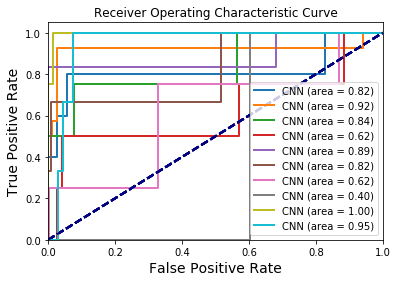

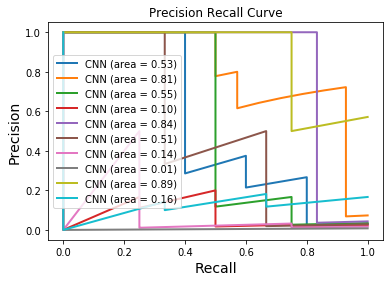

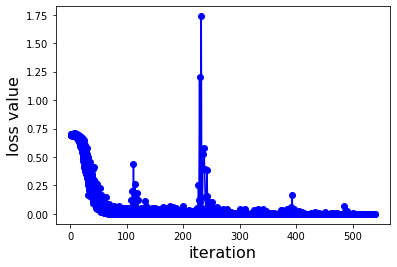

In [5]:
roc_ = []
prc_ = []
scores_ = []
labels_ = []

drug_encoding = 'CNN'

for i in range(10):
    roc, prc, scores, labels = eval('run_' + drug_encoding + '(i, True)')
    roc_.append(roc)
    prc_.append(prc)
    scores_.append(scores)
    labels_.append(labels)
    
print('ROC-Mean {:.4f}'.format(np.mean(np.array(roc_))))
print('ROC-STD {:.4f}'.format(np.std(np.array(roc_))))
print('PRC-Mean {:.4f}'.format(np.mean(np.array(prc_))))
print('PRC-STD {:.4f}'.format(np.std(np.array(prc_))))

with open('./scores_aicures/' + drug_encoding + '_score.pkl', 'wb') as f:
    pickle.dump(scores_, f, pickle.HIGHEST_PROTOCOL)


In [8]:
def run_Pubchem(fold_n, balanced):
    
    train = pd.read_csv('./aicures_data/train_cv/fold_'+str(fold_n)+'/train.csv')
    dev = pd.read_csv('./aicures_data/train_cv/fold_'+str(fold_n)+'/dev.csv')
    test = pd.read_csv('./aicures_data/train_cv/fold_'+str(fold_n)+'/test.csv')
    
    if balanced:
        # oversample balanced training
        train = pd.concat([train[train.activity == 1].sample(n = len(train[train.activity == 0]), replace=True), train[train.activity == 0]]).sample(frac = 1).reset_index(drop = True)
    
    X_train = train.smiles.values
    y_train = train.activity.values
    X_dev = dev.smiles.values
    y_dev = dev.activity.values
    X_test = test.smiles.values
    y_test = test.activity.values
    
    drug_encoding = 'Pubchem'
    train = data_process(X_drug = X_train, y = y_train, 
                                    drug_encoding = drug_encoding,
                                    split_method='no_split', 
                                    random_seed = 1)

    val = data_process(X_drug = X_dev, y = y_dev, 
                                    drug_encoding = drug_encoding,
                                    split_method='no_split', 
                                    random_seed = 1)

    test = data_process(X_drug = X_test, y = y_test, 
                                    drug_encoding = drug_encoding,
                                    split_method='no_split', 
                                    random_seed = 1)
    
    config = generate_config(drug_encoding = drug_encoding, 
                         cls_hidden_dims = [512], 
                         train_epoch = 20, 
                         LR = 0.001, 
                         batch_size = 128,
                        )
    
    model = models.model_initialize(**config)
    model.train(train, val, test)
    
    scores = model.predict(test)
    
    return roc_auc_score(test.Label.values, scores), average_precision_score(test.Label.values, scores), scores, test.Label.values

Drug Property Prediction Mode...
in total: 3330 drugs
encoding drug...
unique drugs: 1694
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 202 drugs
encoding drug...
unique drugs: 202
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 201 drugs
encoding drug...
unique drugs: 201
drug encoding finished...
do not do train/test split on the data for already splitted data
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69445. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.67705 , AUPRC: 0.54223 , F1: 0.66666
Training at Epoch 2 iteration 0 with loss 0.00375. Total time 0.00027 hours
Validation at Epoch 2 , AUROC: 0.77051 , AUPRC: 0.55929 , F1: 0.37837
Training at Epoch 3 iteration 0 with loss 0.11038. Total time 0.00055 hours
Validation at Epoch 3 , AUROC: 

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 15 , AUROC: 0.76015 , AUPRC: 0.52001 , F1: 0.0
Training at Epoch 16 iteration 0 with loss 0.00150. Total time 0.00444 hours
Validation at Epoch 16 , AUROC: 0.75888 , AUPRC: 0.51936 , F1: 0.4
Training at Epoch 17 iteration 0 with loss 0.00160. Total time 0.00472 hours
Validation at Epoch 17 , AUROC: 0.75 , AUPRC: 0.51838 , F1: 0.66666
Training at Epoch 18 iteration 0 with loss 0.02175. Total time 0.005 hours
Validation at Epoch 18 , AUROC: 0.74619 , AUPRC: 0.51757 , F1: 0.66666
Training at Epoch 19 iteration 0 with loss 8.15077. Total time 0.00527 hours
Validation at Epoch 19 , AUROC: 0.75126 , AUPRC: 0.51813 , F1: 0.66666
Training at Epoch 20 iteration 0 with loss 0.00040. Total time 0.00555 hours
Validation at Epoch 20 , AUROC: 0.75253 , AUPRC: 0.51838 , F1: 0.66666
--- Go for Testing ---
Testing AUROC: 0.6694528875379939 , AUPRC: 0.5404400263093706 , F1: 0.6363636363636364
--- Training Finished ---
predicting...
Drug Property Prediction Mode...
in total: 3308 drug

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 19 , AUROC: 0.69191 , AUPRC: 0.04834 , F1: 0.0
Training at Epoch 20 iteration 0 with loss 7.90500. Total time 0.00555 hours
Validation at Epoch 20 , AUROC: 0.69823 , AUPRC: 0.04901 , F1: 0.0
--- Go for Testing ---
Testing AUROC: 0.9302030456852792 , AUPRC: 0.6122685185185185 , F1: 0.6666666666666666
--- Training Finished ---
predicting...
Drug Property Prediction Mode...
in total: 3312 drugs
encoding drug...
unique drugs: 1694
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 201 drugs
encoding drug...
unique drugs: 201
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 202 drugs
encoding drug...
unique drugs: 202
drug encoding finished...
do not do train/test split on the data for already splitted data
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 wi

Validation at Epoch 1 , AUROC: 0.64142 , AUPRC: 0.04892 , F1: 0.0
Training at Epoch 2 iteration 0 with loss 0.02902. Total time 0.00027 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 2 , AUROC: 0.60310 , AUPRC: 0.07339 , F1: 0.0
Training at Epoch 3 iteration 0 with loss 0.02625. Total time 0.00055 hours
Validation at Epoch 3 , AUROC: 0.55930 , AUPRC: 0.06253 , F1: 0.0
Training at Epoch 4 iteration 0 with loss 0.00186. Total time 0.00083 hours
Validation at Epoch 4 , AUROC: 0.57755 , AUPRC: 0.10767 , F1: 0.0
Training at Epoch 5 iteration 0 with loss 0.00307. Total time 0.00111 hours
Validation at Epoch 5 , AUROC: 0.56386 , AUPRC: 0.07861 , F1: 0.0
Training at Epoch 6 iteration 0 with loss 0.00010. Total time 0.00138 hours
Validation at Epoch 6 , AUROC: 0.56843 , AUPRC: 0.09600 , F1: 0.0
Training at Epoch 7 iteration 0 with loss 1.95294. Total time 0.00166 hours
Validation at Epoch 7 , AUROC: 0.57116 , AUPRC: 0.10301 , F1: 0.0
Training at Epoch 8 iteration 0 with loss 3.04729. Total time 0.00194 hours
Validation at Epoch 8 , AUROC: 0.55930 , AUPRC: 0.10831 , F1: 0.0
Training at Epoch 9 iteration 0 with loss 1.32342. Total time 0.00222 hours
Valida

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 3 , AUROC: 0.00966 , AUPRC: 0.00485 , F1: 0.0
Training at Epoch 4 iteration 0 with loss 0.00161. Total time 0.00083 hours
Validation at Epoch 4 , AUROC: 0.00483 , AUPRC: 0.00483 , F1: 0.0
Training at Epoch 5 iteration 0 with loss 0.00208. Total time 0.00083 hours
Validation at Epoch 5 , AUROC: 0.00483 , AUPRC: 0.00483 , F1: 0.0
Training at Epoch 6 iteration 0 with loss 0.00051. Total time 0.00138 hours
Validation at Epoch 6 , AUROC: 0.00483 , AUPRC: 0.00483 , F1: 0.0
Training at Epoch 7 iteration 0 with loss 0.00065. Total time 0.00138 hours
Validation at Epoch 7 , AUROC: 0.00483 , AUPRC: 0.00483 , F1: 0.0
Training at Epoch 8 iteration 0 with loss 0.00158. Total time 0.00166 hours
Validation at Epoch 8 , AUROC: 0.00483 , AUPRC: 0.00483 , F1: 0.0
Training at Epoch 9 iteration 0 with loss 0.00013. Total time 0.00194 hours
Validation at Epoch 9 , AUROC: 0.00966 , AUPRC: 0.00485 , F1: 0.0
Training at Epoch 10 iteration 0 with loss 0.00013. Total time 0.00222 hours
Valid

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 4 , AUROC: 0.70016 , AUPRC: 0.03444 , F1: 0.0
Training at Epoch 5 iteration 0 with loss 0.00034. Total time 0.00111 hours
Validation at Epoch 5 , AUROC: 0.72026 , AUPRC: 0.03743 , F1: 0.0
Training at Epoch 6 iteration 0 with loss 0.00058. Total time 0.00138 hours
Validation at Epoch 6 , AUROC: 0.67671 , AUPRC: 0.03137 , F1: 0.0
Training at Epoch 7 iteration 0 with loss 0.00585. Total time 0.00166 hours
Validation at Epoch 7 , AUROC: 0.70519 , AUPRC: 0.03503 , F1: 0.0
Training at Epoch 8 iteration 0 with loss 0.00022. Total time 0.00194 hours
Validation at Epoch 8 , AUROC: 0.69179 , AUPRC: 0.03398 , F1: 0.0
Training at Epoch 9 iteration 0 with loss 0.00035. Total time 0.00222 hours
Validation at Epoch 9 , AUROC: 0.70016 , AUPRC: 0.03659 , F1: 0.0
Training at Epoch 10 iteration 0 with loss 0.00016. Total time 0.0025 hours
Validation at Epoch 10 , AUROC: 0.71189 , AUPRC: 0.03541 , F1: 0.0
Training at Epoch 11 iteration 0 with loss 0.00030. Total time 0.00277 hours
Vali

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Testing AUROC: 0.7654941373534339 , AUPRC: 0.052405369663397955 , F1: 0.0
--- Training Finished ---
predicting...
ROC-Mean 0.7283
ROC-STD 0.1585
PRC-Mean 0.3850
PRC-STD 0.3321


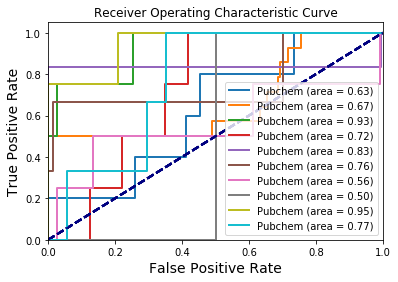

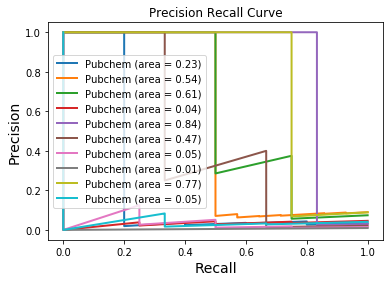

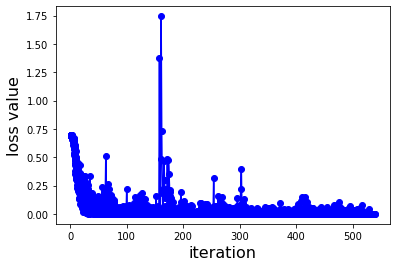

In [9]:
roc_ = []
prc_ = []
scores_ = []
labels_ = []

drug_encoding = 'Pubchem'

for i in range(10):
    roc, prc, scores, labels = eval('run_' + drug_encoding + '(i, True)')
    roc_.append(roc)
    prc_.append(prc)
    scores_.append(scores)
    labels_.append(labels)
    
print('ROC-Mean {:.4f}'.format(np.mean(np.array(roc_))))
print('ROC-STD {:.4f}'.format(np.std(np.array(roc_))))
print('PRC-Mean {:.4f}'.format(np.mean(np.array(prc_))))
print('PRC-STD {:.4f}'.format(np.std(np.array(prc_))))

with open('./scores_aicures/' + drug_encoding + '_score.pkl', 'wb') as f:
    pickle.dump(scores_, f, pickle.HIGHEST_PROTOCOL)


In [9]:
def run_rdkit_2d_normalized(fold_n, balanced):
    
    train = pd.read_csv('./aicures_data/train_cv/fold_'+str(fold_n)+'/train.csv')
    dev = pd.read_csv('./aicures_data/train_cv/fold_'+str(fold_n)+'/dev.csv')
    test = pd.read_csv('./aicures_data/train_cv/fold_'+str(fold_n)+'/test.csv')
    
    test_output = pd.read_csv('./aicures_data/test.csv')

    if balanced:
        # oversample balanced training
        train = pd.concat([train[train.activity == 1].sample(n = len(train[train.activity == 0]), replace=True), train[train.activity == 0]]).sample(frac = 1).reset_index(drop = True)
    
    X_train = train.smiles.values
    y_train = train.activity.values
    X_dev = dev.smiles.values
    y_dev = dev.activity.values
    X_test = test.smiles.values
    y_test = test.activity.values
    
    X_test_output = test_output.smiles.values
    y_test_output = test_output.activity.values
    
    drug_encoding = 'rdkit_2d_normalized'
    train = data_process(X_drug = X_train, y = y_train, 
                                    drug_encoding = drug_encoding,
                                    split_method='no_split', 
                                    random_seed = 1)

    val = data_process(X_drug = X_dev, y = y_dev, 
                                    drug_encoding = drug_encoding,
                                    split_method='no_split', 
                                    random_seed = 1)

    test = data_process(X_drug = X_test, y = y_test, 
                                    drug_encoding = drug_encoding,
                                    split_method='no_split', 
                                    random_seed = 1)
    
    test_output_ = data_process(X_drug = X_test_output, y = y_test_output, 
                                    drug_encoding = drug_encoding,
                                    split_method='no_split', 
                                    random_seed = 1)
    
    config = generate_config(drug_encoding = drug_encoding, 
                         cls_hidden_dims = [512], 
                         train_epoch = 20, 
                         LR = 0.001, 
                         batch_size = 128,
                        )
    
    model = models.model_initialize(**config)
    model.train(train, val, test)
    
    scores = model.predict(test)
    
    test_outputs = model.predict(test_output_)
    
    return roc_auc_score(test.Label.values, scores), average_precision_score(test.Label.values, scores), scores, test.Label.values, test_outputs

Drug Property Prediction Mode...
in total: 3330 drugs
encoding drug...
unique drugs: 1694
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 202 drugs
encoding drug...
unique drugs: 202
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 201 drugs
encoding drug...
unique drugs: 201
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 238 drugs
encoding drug...
unique drugs: 238
drug encoding finished...
do not do train/test split on the data for already splitted data
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69274. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.92325 , AUPRC: 0.78820 , F1: 0.66666
Training at Epoch 2 iteration 0 with loss 0.23882. Total time 0.00027 hour

drug encoding finished...
do not do train/test split on the data for already splitted data
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69331. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.67676 , AUPRC: 0.09521 , F1: 0.19047
Training at Epoch 2 iteration 0 with loss 0.17267. Total time 0.0 hours
Validation at Epoch 2 , AUROC: 0.80934 , AUPRC: 0.13829 , F1: 0.28571
Training at Epoch 3 iteration 0 with loss 0.00816. Total time 0.00027 hours
Validation at Epoch 3 , AUROC: 0.81313 , AUPRC: 0.09637 , F1: 0.0
Training at Epoch 4 iteration 0 with loss 0.00168. Total time 0.00055 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 4 , AUROC: 0.79924 , AUPRC: 0.09149 , F1: 0.0
Training at Epoch 5 iteration 0 with loss 0.00439. Total time 0.00083 hours
Validation at Epoch 5 , AUROC: 0.79671 , AUPRC: 0.12293 , F1: 0.0
Training at Epoch 6 iteration 0 with loss 0.00029. Total time 0.00111 hours
Validation at Epoch 6 , AUROC: 0.81439 , AUPRC: 0.12665 , F1: 0.0
Training at Epoch 7 iteration 0 with loss 0.00062. Total time 0.00138 hours
Validation at Epoch 7 , AUROC: 0.81691 , AUPRC: 0.12738 , F1: 0.0
Training at Epoch 8 iteration 0 with loss 0.00085. Total time 0.00166 hours
Validation at Epoch 8 , AUROC: 0.80555 , AUPRC: 0.12527 , F1: 0.0
Training at Epoch 9 iteration 0 with loss 0.00112. Total time 0.00194 hours
Validation at Epoch 9 , AUROC: 0.82702 , AUPRC: 0.12991 , F1: 0.0
Training at Epoch 10 iteration 0 with loss 0.00191. Total time 0.00222 hours
Validation at Epoch 10 , AUROC: 0.75631 , AUPRC: 0.11793 , F1: 0.0
Training at Epoch 11 iteration 0 with loss 0.00016. Total time 0.0025 hours
Vali

Validation at Epoch 8 , AUROC: 0.74747 , AUPRC: 0.40689 , F1: 0.4
Training at Epoch 9 iteration 0 with loss 0.00117. Total time 0.00194 hours
Validation at Epoch 9 , AUROC: 0.74242 , AUPRC: 0.45102 , F1: 0.30769
Training at Epoch 10 iteration 0 with loss 0.00168. Total time 0.00222 hours
Validation at Epoch 10 , AUROC: 0.75589 , AUPRC: 0.39191 , F1: 0.4
Training at Epoch 11 iteration 0 with loss 0.00024. Total time 0.0025 hours
Validation at Epoch 11 , AUROC: 0.70370 , AUPRC: 0.56117 , F1: 0.5
Training at Epoch 12 iteration 0 with loss 0.03358. Total time 0.00277 hours
Validation at Epoch 12 , AUROC: 0.77777 , AUPRC: 0.50751 , F1: 0.33333
Training at Epoch 13 iteration 0 with loss 0.00314. Total time 0.00333 hours
Validation at Epoch 13 , AUROC: 0.81986 , AUPRC: 0.47601 , F1: 0.4
Training at Epoch 14 iteration 0 with loss 0.00023. Total time 0.00361 hours
Validation at Epoch 14 , AUROC: 0.82154 , AUPRC: 0.47610 , F1: 0.4
Training at Epoch 15 iteration 0 with loss 6.49103. Total time 0.

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 1 , AUROC: 0.73448 , AUPRC: 0.10810 , F1: 0.0
Training at Epoch 2 iteration 0 with loss 0.30199. Total time 0.0 hours
Validation at Epoch 2 , AUROC: 0.89142 , AUPRC: 0.08078 , F1: 0.0
Training at Epoch 3 iteration 0 with loss 0.03124. Total time 0.00027 hours
Validation at Epoch 3 , AUROC: 0.91697 , AUPRC: 0.10004 , F1: 0.0
Training at Epoch 4 iteration 0 with loss 0.02150. Total time 0.00055 hours
Validation at Epoch 4 , AUROC: 0.93795 , AUPRC: 0.14648 , F1: 0.0
Training at Epoch 5 iteration 0 with loss 0.06831. Total time 0.00083 hours
Validation at Epoch 5 , AUROC: 0.94343 , AUPRC: 0.17374 , F1: 0.0
Training at Epoch 6 iteration 0 with loss 0.04812. Total time 0.00111 hours
Validation at Epoch 6 , AUROC: 0.93978 , AUPRC: 0.16427 , F1: 0.0
Training at Epoch 7 iteration 0 with loss 0.00038. Total time 0.00138 hours
Validation at Epoch 7 , AUROC: 0.94069 , AUPRC: 0.17439 , F1: 0.0
Training at Epoch 8 iteration 0 with loss 0.00121. Total time 0.00166 hours
Validation

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 5 , AUROC: 0.70531 , AUPRC: 0.01612 , F1: 0.0
Training at Epoch 6 iteration 0 with loss 0.00257. Total time 0.00083 hours
Validation at Epoch 6 , AUROC: 0.79227 , AUPRC: 0.02272 , F1: 0.0
Training at Epoch 7 iteration 0 with loss 0.00023. Total time 0.00111 hours
Validation at Epoch 7 , AUROC: 0.75845 , AUPRC: 0.01960 , F1: 0.0
Training at Epoch 8 iteration 0 with loss 0.00011. Total time 0.00138 hours
Validation at Epoch 8 , AUROC: 0.75845 , AUPRC: 0.01960 , F1: 0.0
Training at Epoch 9 iteration 0 with loss 6.79026. Total time 0.00166 hours
Validation at Epoch 9 , AUROC: 0.75845 , AUPRC: 0.01960 , F1: 0.0
Training at Epoch 10 iteration 0 with loss 7.42084. Total time 0.00194 hours
Validation at Epoch 10 , AUROC: 0.75845 , AUPRC: 0.01960 , F1: 0.0
Training at Epoch 11 iteration 0 with loss 2.29539. Total time 0.00194 hours
Validation at Epoch 11 , AUROC: 0.75845 , AUPRC: 0.01960 , F1: 0.0
Training at Epoch 12 iteration 0 with loss 3.62600. Total time 0.00222 hours
V

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Testing AUROC: 0.8467153284671532 , AUPRC: 0.33697752019669824 , F1: 0.0
--- Training Finished ---
predicting...
predicting...
Drug Property Prediction Mode...
in total: 3290 drugs
encoding drug...
unique drugs: 1688
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 201 drugs
encoding drug...
unique drugs: 201
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 208 drugs
encoding drug...
unique drugs: 208
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 238 drugs
encoding drug...
unique drugs: 238
drug encoding finished...
do not do train/test split on the data for already splitted data
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69304. Total time 0.0 hours
Validation at Epo

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 3 , AUROC: 0.70351 , AUPRC: 0.03229 , F1: 0.0
Training at Epoch 4 iteration 0 with loss 0.00256. Total time 0.00055 hours
Validation at Epoch 4 , AUROC: 0.85427 , AUPRC: 0.06420 , F1: 0.0
Training at Epoch 5 iteration 0 with loss 0.00103. Total time 0.00083 hours
Validation at Epoch 5 , AUROC: 0.82412 , AUPRC: 0.05201 , F1: 0.0
Training at Epoch 6 iteration 0 with loss 0.01604. Total time 0.00111 hours
Validation at Epoch 6 , AUROC: 0.77219 , AUPRC: 0.04697 , F1: 0.0
Training at Epoch 7 iteration 0 with loss 0.00423. Total time 0.00138 hours
Validation at Epoch 7 , AUROC: 0.80904 , AUPRC: 0.04784 , F1: 0.0
Training at Epoch 8 iteration 0 with loss 0.00088. Total time 0.00166 hours
Validation at Epoch 8 , AUROC: 0.86097 , AUPRC: 0.07747 , F1: 0.0
Training at Epoch 9 iteration 0 with loss 0.00138. Total time 0.00194 hours
Validation at Epoch 9 , AUROC: 0.69011 , AUPRC: 0.03933 , F1: 0.0
Training at Epoch 10 iteration 0 with loss 0.00028. Total time 0.00194 hours
Valid

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 4 , AUROC: 0.85918 , AUPRC: 0.40841 , F1: 0.0
Training at Epoch 5 iteration 0 with loss 0.00344. Total time 0.00083 hours
Validation at Epoch 5 , AUROC: 0.82857 , AUPRC: 0.38708 , F1: 0.0
Training at Epoch 6 iteration 0 with loss 0.00087. Total time 0.00111 hours
Validation at Epoch 6 , AUROC: 0.83163 , AUPRC: 0.52045 , F1: 0.28571
Training at Epoch 7 iteration 0 with loss 0.00049. Total time 0.00138 hours
Validation at Epoch 7 , AUROC: 0.83061 , AUPRC: 0.39287 , F1: 0.0
Training at Epoch 8 iteration 0 with loss 0.00530. Total time 0.00166 hours
Validation at Epoch 8 , AUROC: 0.83979 , AUPRC: 0.39324 , F1: 0.0
Training at Epoch 9 iteration 0 with loss 0.00014. Total time 0.00166 hours
Validation at Epoch 9 , AUROC: 0.83469 , AUPRC: 0.37311 , F1: 0.0
Training at Epoch 10 iteration 0 with loss 0.00019. Total time 0.00194 hours
Validation at Epoch 10 , AUROC: 0.83979 , AUPRC: 0.38753 , F1: 0.0
Training at Epoch 11 iteration 0 with loss 0.00010. Total time 0.00222 hours

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Testing AUROC: 0.8944723618090452 , AUPRC: 0.17526455026455023 , F1: 0.0
--- Training Finished ---
predicting...
predicting...
ROC-Mean 0.8399
ROC-STD 0.0852
PRC-Mean 0.4991
PRC-STD 0.2985


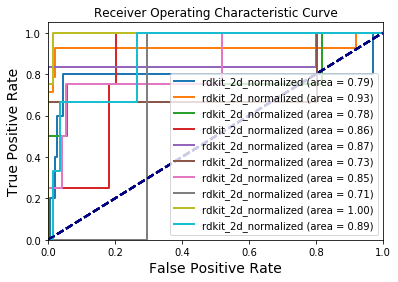

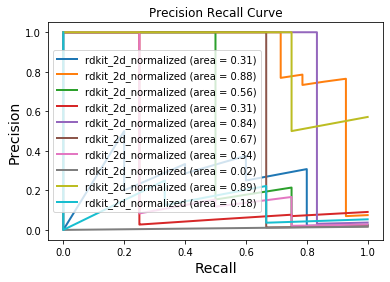

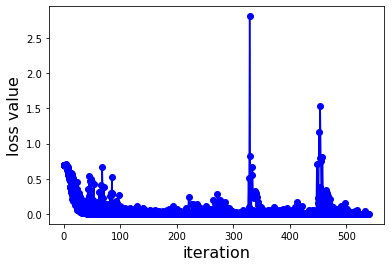

In [22]:
roc_ = []
prc_ = []
scores_ = []
labels_ = []
outputs = []
drug_encoding = 'rdkit_2d_normalized'

for i in range(10):
    roc, prc, scores, labels, test_ = eval('run_' + drug_encoding + '(i, True)')
    roc_.append(roc)
    prc_.append(prc)
    scores_.append(scores)
    labels_.append(labels)
    outputs.append(test_)
print('ROC-Mean {:.4f}'.format(np.mean(np.array(roc_))))
print('ROC-STD {:.4f}'.format(np.std(np.array(roc_))))
print('PRC-Mean {:.4f}'.format(np.mean(np.array(prc_))))
print('PRC-STD {:.4f}'.format(np.std(np.array(prc_))))

with open('./scores_aicures/' + drug_encoding + '_score.pkl', 'wb') as f:
    pickle.dump(scores_, f, pickle.HIGHEST_PROTOCOL)


In [26]:
outputs = np.mean(np.array([np.array(i) for i in outputs]), axis = 0)

In [27]:
test_output = pd.read_csv('./aicures_data/test.csv')
test_output.activity = outputs 

In [28]:
test_output.to_csv('./aicures_data/test_pred.csv')

In [ ]:
# ensembling

In [36]:
models = ['MPNN','CNN','rdkit_2d_normalized','Morgan','Daylight','Pubchem']

scores_total = []

for drug_encoding in models:
    with open('./scores_aicures/' + drug_encoding + '_score.pkl', 'rb') as f:
        score = pickle.load(f)
    scores_total.append(np.array([np.array(i) for i in score]))

In [75]:
s = np.array(scores_total).T
max_ = []
for i in range(10):
    max_.append(np.max(np.stack(s[i]), axis = 0))

In [89]:
ensemble_mean = np.mean(np.array(scores_total), axis = 0)

In [90]:
ensemble_max = np.array(max_)

In [92]:
ensemble = (ensemble_mean + ensemble_max)/2

In [93]:
roc_ = []
prc_ = []

for i in range(ensemble.shape[0]):
    
    roc = roc_auc_score(labels_[i], ensemble[i])
    prc = average_precision_score(labels_[i], ensemble[i])
    
    roc_.append(roc)
    prc_.append(prc)

In [85]:
# mean
print('ROC-Mean {:.4f}'.format(np.mean(np.array(roc_))))
print('ROC-STD {:.4f}'.format(np.std(np.array(roc_))))
print('PRC-Mean {:.4f}'.format(np.mean(np.array(prc_))))
print('PRC-STD {:.4f}'.format(np.std(np.array(prc_))))

ROC-Mean 0.7132
ROC-STD 0.2574
PRC-Mean 0.4872
PRC-STD 0.3355


In [88]:
# max
print('ROC-Mean {:.4f}'.format(np.mean(np.array(roc_))))
print('ROC-STD {:.4f}'.format(np.std(np.array(roc_))))
print('PRC-Mean {:.4f}'.format(np.mean(np.array(prc_))))
print('PRC-STD {:.4f}'.format(np.std(np.array(prc_))))

ROC-Mean 0.7011
ROC-STD 0.2641
PRC-Mean 0.5036
PRC-STD 0.3237


In [94]:
# mean + max
print('ROC-Mean {:.4f}'.format(np.mean(np.array(roc_))))
print('ROC-STD {:.4f}'.format(np.std(np.array(roc_))))
print('PRC-Mean {:.4f}'.format(np.mean(np.array(prc_))))
print('PRC-STD {:.4f}'.format(np.std(np.array(prc_))))

ROC-Mean 0.6988
ROC-STD 0.2759
PRC-Mean 0.5176
PRC-STD 0.3354


In [96]:
model.save_model('./model')

In [ ]:
# Repurposing

In [2]:
from DeepPurpose import property_pred

In [3]:
model = property_pred.model_pretrained('./model')

In [4]:
drug_smiles, drug_names, cid = load_antiviral_drugs()

In [6]:
pred = property_pred.repurpose(drug_smiles, model, drug_names)

repurposing...
Drug Property Prediction Mode...
in total: 82 drugs
encoding drug...
unique drugs: 81
drug encoding finished...
Done.
predicting...
---------------
Drug Repurposing Result
+------+----------------------+-------------+-------------+
| Rank |      Drug Name       | Interaction | Probability |
+------+----------------------+-------------+-------------+
|  1   |     Elvitegravir     |     YES     |     0.92    |
|  2   |      Letermovir      |      NO     |     0.44    |
|  3   |     Bictegravir      |      NO     |     0.39    |
|  4   |     Dolutegravir     |      NO     |     0.26    |
|  5   |     Ibacitabine      |      NO     |     0.13    |
|  6   |      Cidofovir       |      NO     |     0.00    |
|  7   |    Emtricitabine     |      NO     |     0.00    |
|  8   |      Zanamivir       |      NO     |     0.00    |
|  9   |      Docosanol       |      NO     |     0.00    |
|  10  |      Vidarabine      |      NO     |     0.00    |
checkout ./result/repurposing.txt